### Compare memory/CPU use of SENS with big/small CLAP & with or without PCA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from matplotlib.patches import Patch

directory="/home/amaia/code/sens-sensor"

# Set the working directory
os.chdir(directory)

#### Common functions

In [7]:
# Convert uptime_readable to seconds
def convert_uptime_to_seconds(uptime_str):
    h, m, s = map(int, uptime_str.split(':'))
    return h * 3600 + m * 60 + s

# Load JSON files and convert to DataFrames
def load_json_to_df(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Convert JSON to DataFrame
    records = []
    for key, value in data.items():
        record = {
            "up_time": convert_uptime_to_seconds(value["uptime"]["uptime_readable"]),
            "memory_info-percent_used": value["memory_info"]["percent_used"],
            "cpu_info-cpu_usage_percent": value["cpu_info"]["cpu_usage_percent"],
            "temperature-temperature_celsius": value["temperature"]["temperature_celsius"],
        }
        records.append(record)
    
    return pd.DataFrame(records)


def prepare_df(df, length, start_i):
    
    # Extract desired df subset
    df=df.iloc[start_i:start_i + length]
    
    # Normalize time
    df["Time"] = df["up_time"] - df["up_time"].iloc[0]
    return df

def smooth_data(series, window):
    return series.rolling(window=window, min_periods=1, center=True).mean()

#### Common configurations

In [8]:
font_properties_labels = {"fontsize": 18, "fontweight": "bold", "family": "Roboto"}
font_properties_title = {"fontsize": 20, "fontweight": "bold", "family": "Roboto"}
colors={
        "birds":"#8F7E8A",
        "construction": "#EE9E2E",
        "dogs": "#84B66F",
        "human":"#FABA32",
        "music": "#0DB2AC",
        "nature":"#A26294",
        "siren": "#FC694D",
        "vehicles": "#CF6671"
        }

### Graph of SENS boot up

/tmp/ipykernel_38973/3568150383.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = df["up_time"] - df["up_time"].iloc[0]
/tmp/ipykernel_38973/3568150383.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Time"] = df["up_time"] - df["up_time"].iloc[0]
/tmp/ipykernel_38973/3568150383.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

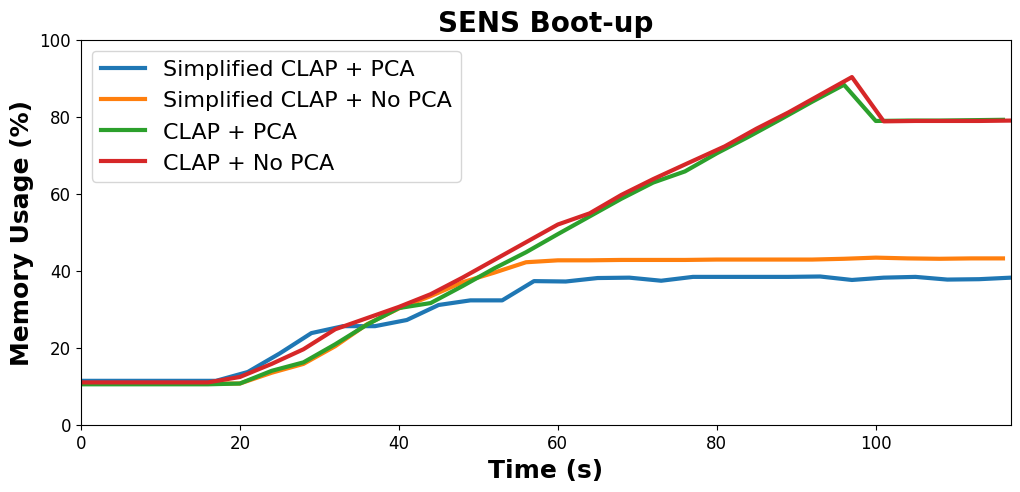

In [9]:
# Load data
path="USS Poster/status_monitoring_files/status_monitor_smallCLAP_PCA.json"
df_smallCLAP_PCA=load_json_to_df(file_path=path)
path="USS Poster/status_monitoring_files/status_monitor_smallCLAP_noPCA.json"
df_smallCLAP_noPCA=load_json_to_df(file_path=path)
path="USS Poster/status_monitoring_files/status_monitor_bigCLAP_PCA.json"
df_bigCLAP_PCA=load_json_to_df(file_path=path)
path="USS Poster/status_monitoring_files/status_monitor_bigCLAP_noPCA.json"
df_bigCLAP_noPCA=load_json_to_df(file_path=path)

# Extract specific rows (assuming indices to extract are predefined)
df_smallCLAP_PCA=prepare_df(df=df_smallCLAP_PCA, length=30, start_i=3)
df_smallCLAP_noPCA=prepare_df(df=df_smallCLAP_noPCA, length=30, start_i=0)
df_bigCLAP_PCA=prepare_df(df=df_bigCLAP_PCA, length=30, start_i=0)
df_bigCLAP_noPCA=prepare_df(df=df_bigCLAP_noPCA, length=30, start_i=0)


# Plot the extracted data
plt.figure(figsize=(12, 5), dpi=100) #dpi=300 
plt.xlabel("Time (s)", **font_properties_labels)
plt.ylabel("Memory Usage (%)", **font_properties_labels)
plt.title("SENS Boot-up", **font_properties_title)
plt.plot(df_smallCLAP_PCA["Time"], df_smallCLAP_PCA["memory_info-percent_used"], label=f"Simplified CLAP + PCA", linewidth=3) # color=
plt.plot(df_smallCLAP_noPCA["Time"], df_smallCLAP_noPCA["memory_info-percent_used"], label=f"Simplified CLAP + No PCA", linewidth=3)# color=
plt.plot(df_bigCLAP_PCA["Time"], df_bigCLAP_PCA["memory_info-percent_used"], label=f"CLAP + PCA", linewidth=3)# color=
plt.plot(df_bigCLAP_noPCA["Time"], df_bigCLAP_noPCA["memory_info-percent_used"], label=f"CLAP + No PCA", linewidth=3)# color=
plt.xlim((0,117))
plt.ylim((0,100))
plt.legend()
plt.legend(fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Graph of SENS monitoring

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.


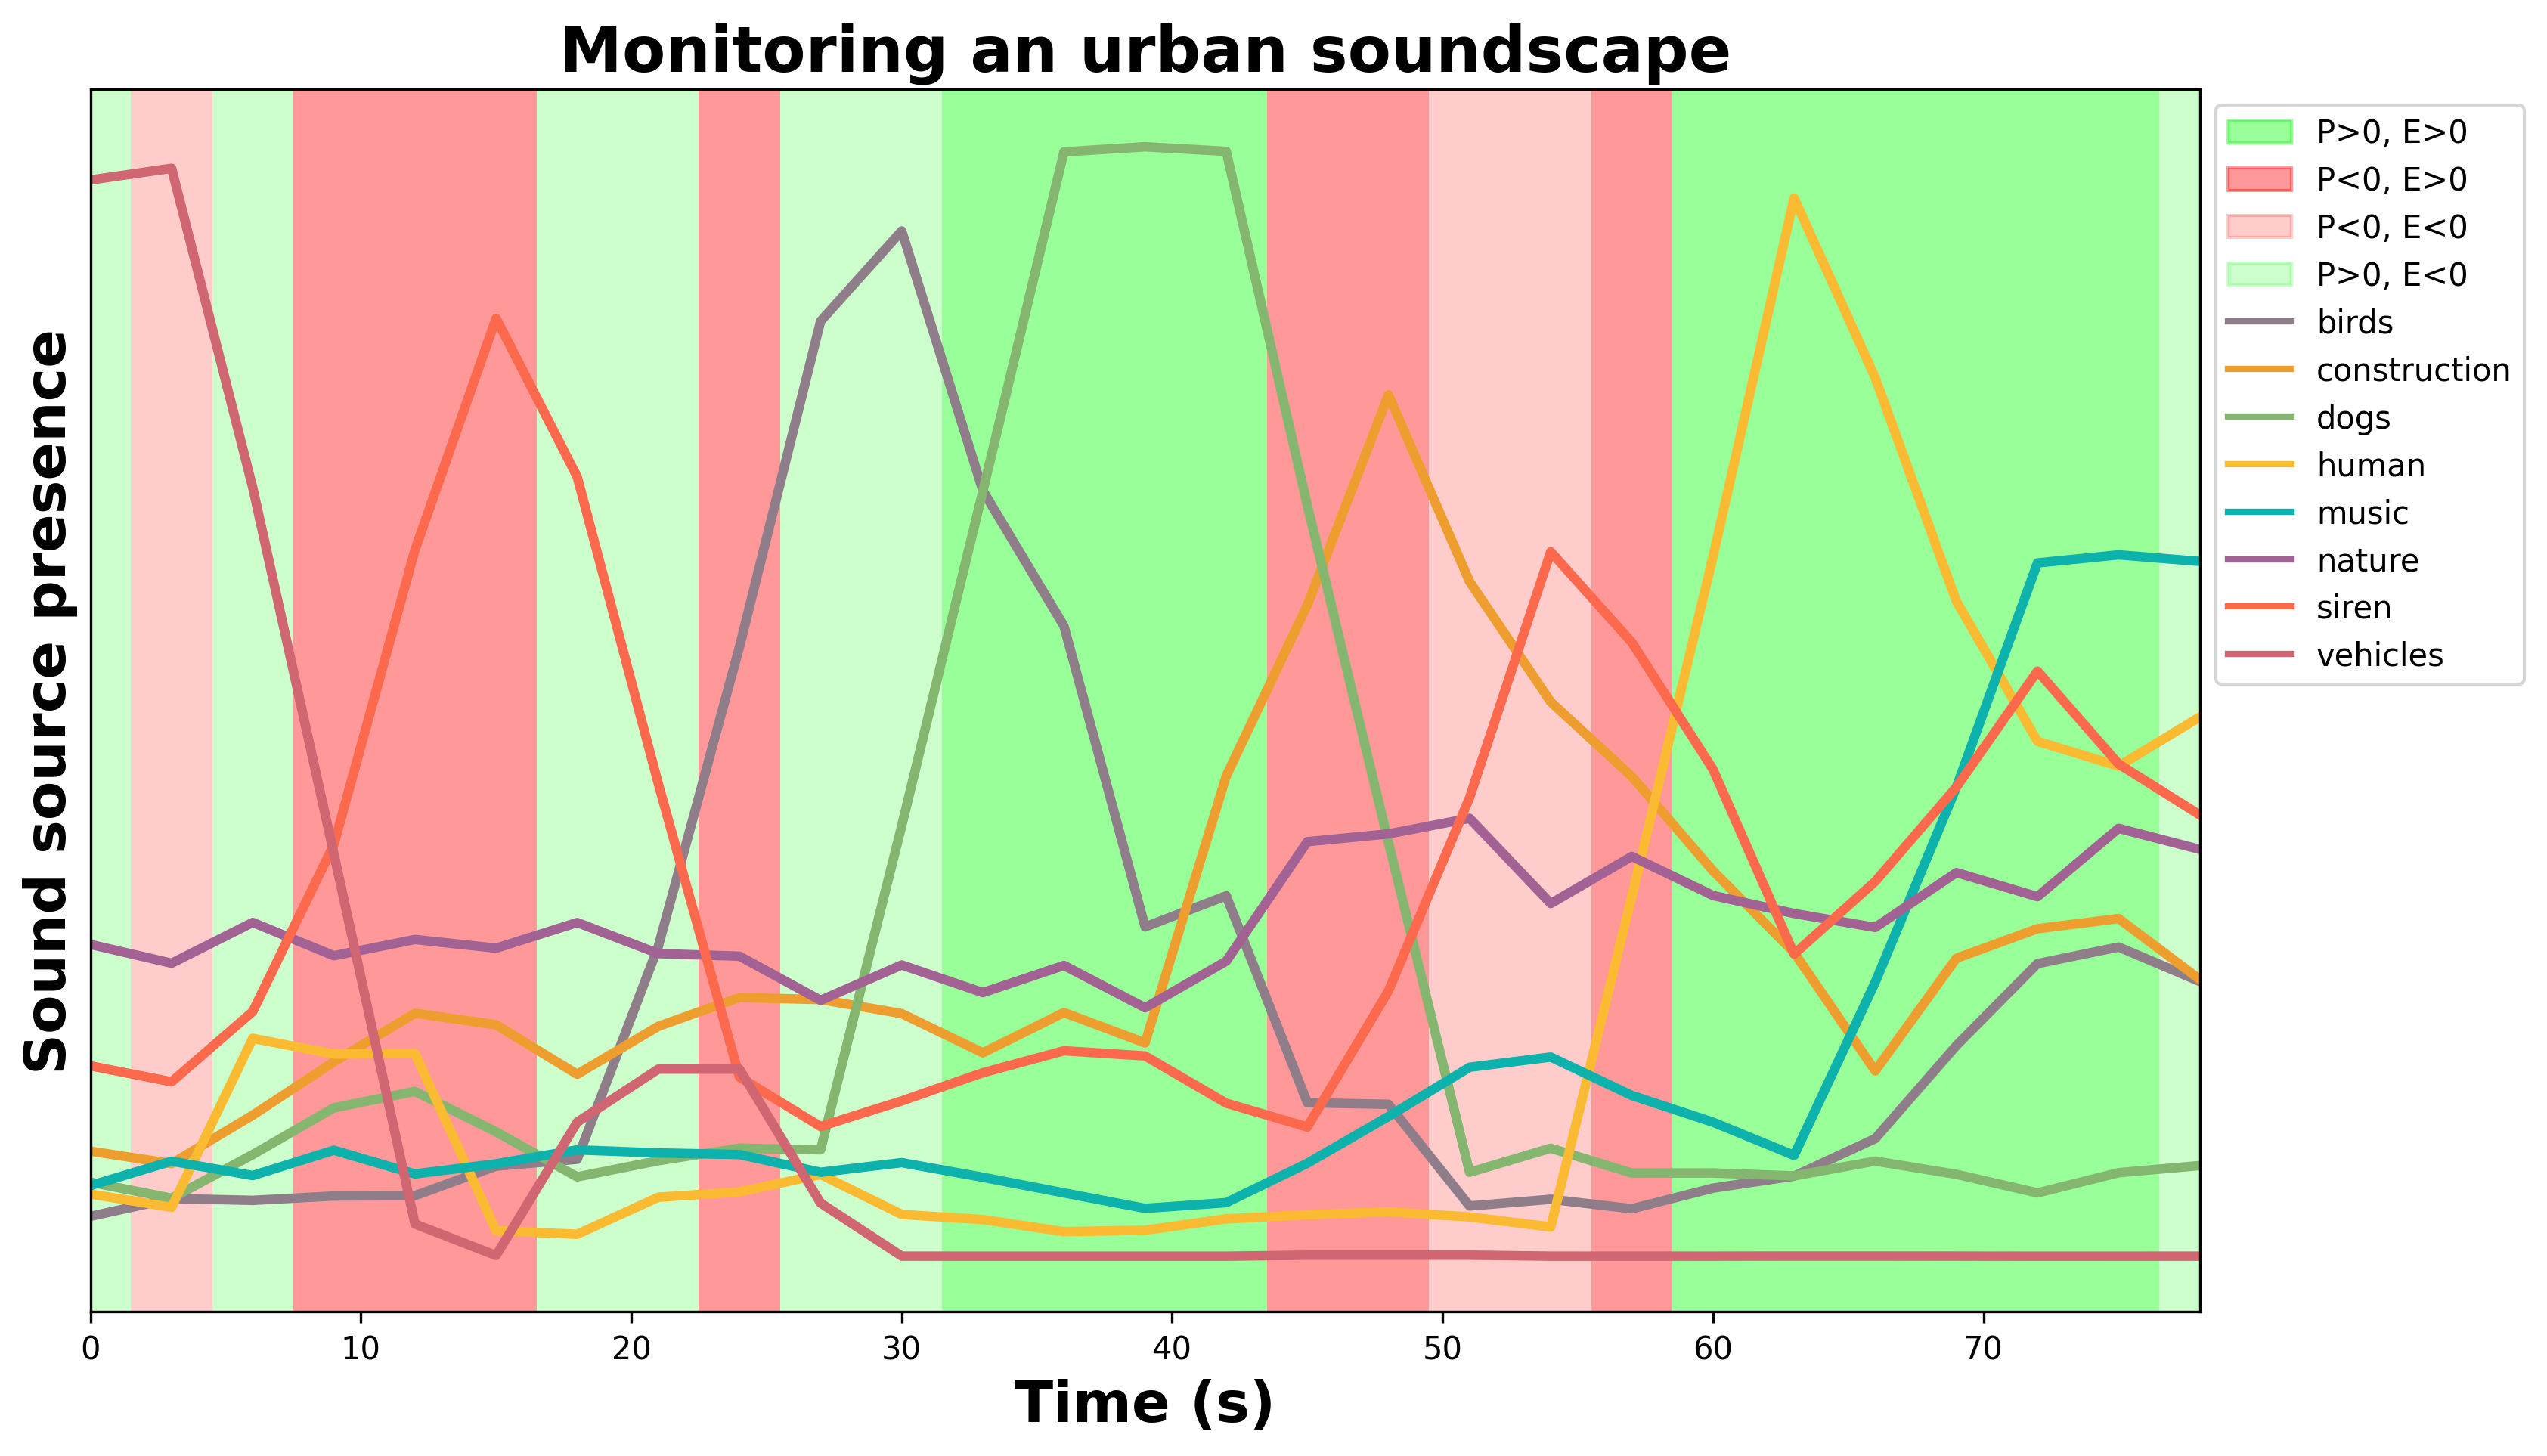

In [ ]:
# load data
path="USS Poster/simulation_Ciutat_proactiva/data.csv"
df=pd.read_csv(path)

# Configurations
columns_to_plot = ["birds", "construction", "dogs", "human", "music", "nature", "siren", "vehicles"]
smoothing_window = 3  # Number of points for moving average

# Plot
plt.figure(figsize=(12, 7), dpi=100) #dpi=300 
plt.xlabel("Time (s)", **font_properties_labels)
plt.ylabel("Sound source presence", **font_properties_labels)
plt.title("Monitoring an urban soundscape", **font_properties_title)

# Background color based on P-E quadrants #########################################
colors_PE = []
for p, e in zip(df["P_inst"], df["E_inst"]):
    if p > -0.10 and e > 0:
        colors_PE.append((0, 1, 0, 0.4))  # Green, alpha 0.4
    elif p < -0.10 and e > 0:
        colors_PE.append((1, 0, 0, 0.4))  # red, alpha 0.4
    elif p < -0.10 and e < 0:
        colors_PE.append((1, 0, 0, 0.2))  # Red, alpha 0.2
    else:
        colors_PE.append((0, 1, 0, 0.2))  # green, alpha 0.2
# Ensure bars touch each other
bar_width = np.min(np.diff(df["elapsed_time"])) if len(df["elapsed_time"]) > 1 else 1
# Create the bars for P and E (instantaneous, audio is too short to consider integrated values)
plt.bar(df["elapsed_time"], height=1.3, bottom=-0.15, color=colors_PE, width=bar_width)

# Add sources #########################################
for col in columns_to_plot:
    plt.plot(df["elapsed_time"], smooth_data(df[col], smoothing_window), label=col, color=colors[col], linewidth=3)

# Create custom legend #########################################
handles = [
    Patch(color=(0, 1, 0, 0.4), label="P>0, E>0"),  # Quadrant I
    Patch(color=(1, 0, 0, 0.4), label="P<0, E>0"),   # Quadrant II
    Patch(color=(1, 0, 0, 0.2), label="P<0, E<0"),  # Quadrant III
    Patch(color=(0, 1, 0, 0.2), label="P>0, E<0")  # Quadrant IV
]

# Add the legend for both quadrants and sound sources
# We combine the sound sources and quadrant legend handles
handles.extend([plt.Line2D([0], [0], color=colors[col], lw=2, label=col) for col in columns_to_plot])

# Add the combined legend to the plot
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))

# Formatting
plt.yticks([])  # Hide y-axis since bars cover full height
plt.ylim(-0.05, 1.05)  # Fix Y-axis from 0 to 1
plt.xlim(df["elapsed_time"].min(), df["elapsed_time"].max())  # Exact elapsed time range
plt.show()